In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline


from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.migdal import MIGDAL, SD_MIGDAL
from models.inelastic import SIInel
from detectors.dama import DAMA
from veldists import VelDist
from constants import *

In [3]:
## Step 1
Det = DAMA()
Model = MIGDAL()
Model2 = SD_MIGDAL()
Dist = VelDist("avSHM",0.3)

E = np.logspace(0,4, base= 10, num = 100)
mX = 1*GeV; sig = 1e-36; 

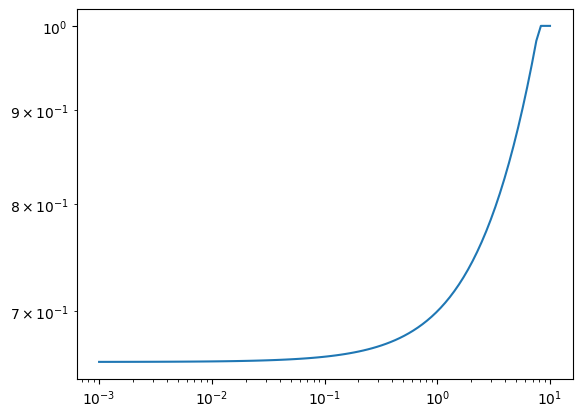

In [4]:
# total = [Minimal[0][x]+Minimal[1][x] for x in range(len(E))];
# detTrue = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False) for e in E];
# detTrue_SD = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False, SI=False, jx = 0) for e in E];
Efficiency = np.array([Det.Eff(e) for e in E*1e-3]);
# Resolution = np.array([integrate.quad(lambda e2: Det.Res(e*1e-3, e2), 0, 60)[0] for e in E]);

plt.plot(E*1e-3, Efficiency)
plt.xscale('log')
plt.yscale('log')

In [5]:
# plt.plot(E,dRdE_Smeared)
# plt.xscale('log')

In [6]:
# fig, ax = plt.subplots()
# # ax.plot(E*1e-3, Minimal[0]*Efficiency*Resolution)
# # ax.plot(E*1e-3, Minimal[1]*Efficiency*Resolution)
# # ax.plot(E*1e-3,total*Efficiency*Resolution, linewidth=1.5, linestyle='dotted', color = 'black')
# ax.plot(E*1e-3,detTrue, linewidth=1.5, color = 'Black')
# ax.plot(E*1e-3,detTrue_SD, linewidth=1.5, color = 'Red')

# ax.set_xscale('log')
# ax.set_yscale('log')

In [18]:
E = np.logspace(0,4, base= 10, num = 100)
SI_MIGDAL_Helm = [[Model.dRdER(target, e, mX, sig, Dist, SI=True) for e in E] for target in Det.Nuclei()];
SI_MIGDAL = [[Model.dRdER(target, e, mX, sig, Dist, SI=True, Helm=False) for e in E] for target in Det.Nuclei()];

SD_MIGDALp_10 = [[Model.dRdER(target, e, mX, sig, Dist, SI=False, cp=1, cn=0, jx=1) for e in E] for target in Det.Nuclei()];
SD_MIGDALp_05 = [[Model.dRdER(target, e, mX, sig, Dist, SI=False, cp=1, cn=0, jx=0.5) for e in E] for target in Det.Nuclei()];

SD_MIGDALn_10 = [[Model.dRdER(target, e, mX, sig, Dist, SI=False, cp=0, cn=1, jx=1) for e in E] for target in Det.Nuclei()];
SD_MIGDALn_05 = [[Model.dRdER(target, e, mX, sig, Dist, SI=False, cp=0, cn=1, jx=0.5) for e in E] for target in Det.Nuclei()];


# WIMP_Single = [[Model2.dRdESingle(target, mX, sig, Dist, e) for e in E] for target in Det.Nuclei()]
# total = [Minimal[0][x]+Minimal[1][x] for x in range(len(E))];
# detTrue = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False) for e in E];
# detTrue_SD = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False, SI=False, jx = 0) for e in E];
# Efficiency = np.array([Det.Eff(e) for e in E*1e-3]);
# Resolution = np.array([integrate.quad(lambda e2: Det.Res(e*1e-3, e2), 0, 60)[0] for e in E]);



In [8]:
# SD_Total_NA = [np.sum(a) for a in WIMP_Ionisation[0]]
# SD_Total_I  = [np.sum(a) for a in WIMP_Ionisation[1]]


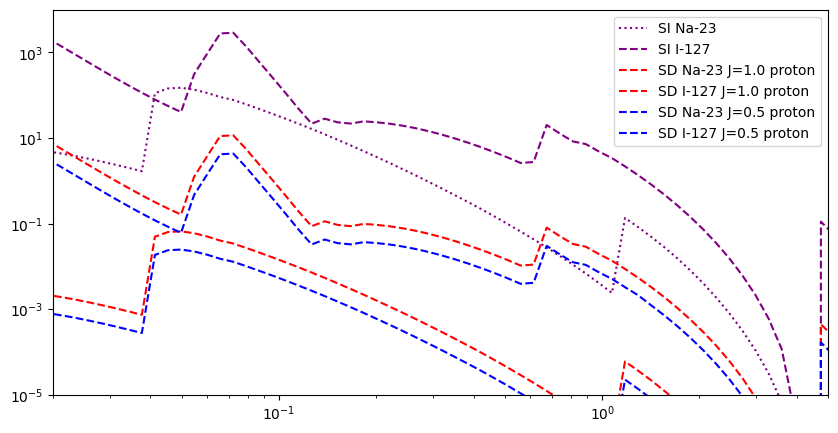

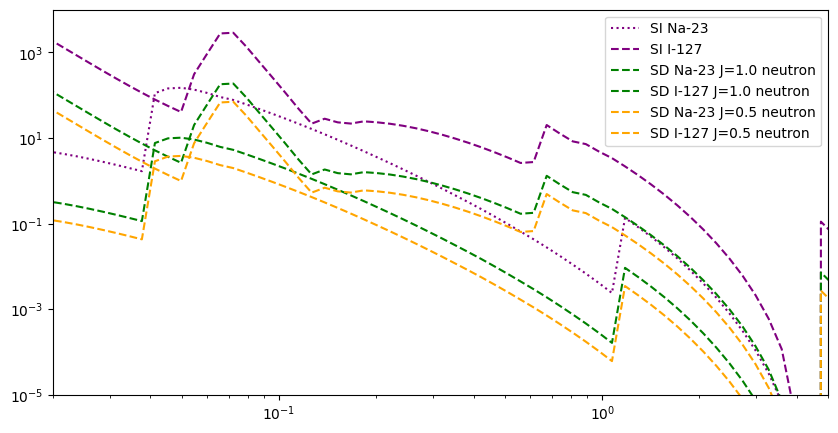

In [28]:
""" MIGDAL SI vs SD """
# plt.plot(E*1e-3, np.array(SI_MIGDAL[0])*1e3, color = 'black', linestyle = 'dotted', label = 'SI Na-23')
# plt.plot(E*1e-3, np.array(SI_MIGDAL[1])*1e3, color = 'black', linestyle = 'dashed', label = 'SI I-127')
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(E*1e-3, np.array(SI_MIGDAL_Helm[0])*1e3, color = 'purple', linestyle = 'dotted', label = 'SI Na-23')
plt.plot(E*1e-3, np.array(SI_MIGDAL_Helm[1])*1e3, color = 'purple', linestyle = 'dashed', label = 'SI I-127')

plt.plot(E*1e-3, np.array(SD_MIGDALp_10[0])*1e3, color = 'red', linestyle = 'dashed', label = 'SD Na-23 J=1.0 proton')
plt.plot(E*1e-3, np.array(SD_MIGDALp_10[1])*1e3, color = 'red', linestyle = 'dashed', label = 'SD I-127 J=1.0 proton')

plt.plot(E*1e-3, np.array(SD_MIGDALp_05[0])*1e3, color = 'blue', linestyle = 'dashed', label = 'SD Na-23 J=0.5 proton')
plt.plot(E*1e-3, np.array(SD_MIGDALp_05[1])*1e3, color = 'blue', linestyle = 'dashed', label = 'SD I-127 J=0.5 proton')


plt.xscale('log'); plt.yscale('log')
plt.xlim(2e-2,5e0); plt.ylim(1e-5,1e4)
plt.legend()
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(E*1e-3, np.array(SI_MIGDAL_Helm[0])*1e3, color = 'purple', linestyle = 'dotted', label = 'SI Na-23')
plt.plot(E*1e-3, np.array(SI_MIGDAL_Helm[1])*1e3, color = 'purple', linestyle = 'dashed', label = 'SI I-127')

plt.plot(E*1e-3, np.array(SD_MIGDALn_10[0])*1e3, color = 'green', linestyle = 'dashed', label = 'SD Na-23 J=1.0 neutron')
plt.plot(E*1e-3, np.array(SD_MIGDALn_10[1])*1e3, color = 'green', linestyle = 'dashed', label = 'SD I-127 J=1.0 neutron')

plt.plot(E*1e-3, np.array(SD_MIGDALn_05[0])*1e3, color = 'orange', linestyle = 'dashed', label = 'SD Na-23 J=0.5 neutron')
plt.plot(E*1e-3, np.array(SD_MIGDALn_05[1])*1e3, color = 'orange', linestyle = 'dashed', label = 'SD I-127 J=0.5 neutron')




# # plt.plot(E*1e-3, np.array(WIMP_Ionisation[0])*1e3)
# plt.plot(E*1e-3, np.array(SD_Total_I)*1e3)
# # plt.plot(E*1e-3, [np.sum(ev) for ev in np.array(WIMP_Ionisation[0])*1e3])

# # plt.plot(E*1e-3, np.array(WIMP_Ionisation[1])*1e3)
# # plt.plot(E*1e-3, [np.sum(ev) for ev in np.array(WIMP_Ionisation[1])*1e3])

# plt.plot(E*1e-3, np.array(Minimal[1])*1e3*Efficiency, color = 'black', linestyle = 'dotted')
# plt.plot(E*1e-3, np.array(Minimal[1])*1e3, color = 'r', linestyle = 'dotted')
# # plt.plot(E, WIMP_Single[0])
# # plt.plot(E, WIMP_Ionisation[1])

plt.xscale('log'); plt.yscale('log')
plt.xlim(2e-2,5e0); plt.ylim(1e-5,1e4)
plt.legend()

In [ ]:
Efficiency

array([0.6570429 , 0.65704708, 0.65705167, 0.65705671, 0.65706224,
       0.65706831, 0.65707497, 0.65708228, 0.6570903 , 0.6570991 ,
       0.65710877, 0.65711937, 0.65713101, 0.65714378, 0.6571578 ,
       0.65717319, 0.65719007, 0.65720861, 0.65722894, 0.65725127,
       0.65727576, 0.65730265, 0.65733216, 0.65736454, 0.65740009,
       0.65743909, 0.65748191, 0.65752889, 0.65758046, 0.65763705,
       0.65769916, 0.65776733, 0.65784214, 0.65792425, 0.65801437,
       0.65811327, 0.65822181, 0.65834093, 0.65847167, 0.65861516,
       0.65877263, 0.65894546, 0.65913514, 0.65934332, 0.65957179,
       0.65982253, 0.66009773, 0.66039975, 0.66073122, 0.66109501,
       0.66149427, 0.66193246, 0.66241337, 0.66294116, 0.66352042,
       0.66415615, 0.66485387, 0.66561961, 0.66646001, 0.66738235,
       0.66839462, 0.66950558, 0.67072486, 0.67206301, 0.67353164,
       0.67514345, 0.67691242, 0.67885385, 0.68098458, 0.68332304,
       0.68588951, 0.6887062 , 0.69179751, 0.69519023, 0.69891